In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#Load image

In [14]:
#Load Image

In [15]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

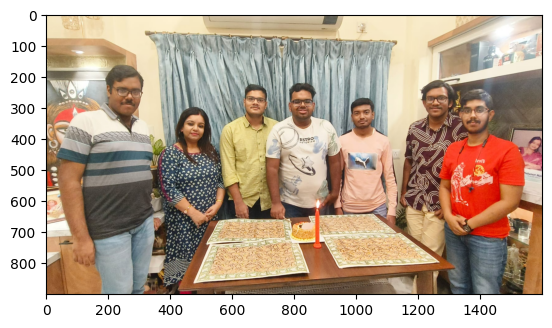

In [ ]:
img=read_file("C:/Users/aishi/OneDrive/Desktop/Personal Projects/debjyoti.png")

Edge Mask

In [17]:
def edmask(img,linesize,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    grayblur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(grayblur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,linesize,blur_value)
    return edges

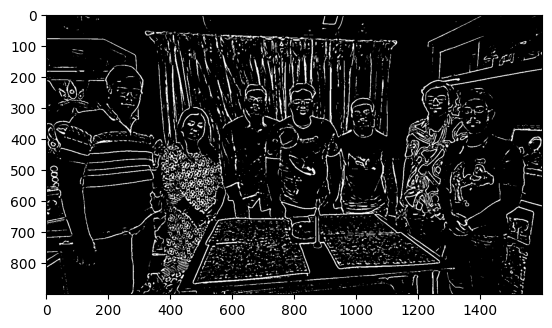

In [18]:
linesize,blur_value=7,7
edges=edmask(img,linesize,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

In [19]:
def color_quantization(img,k):
    #k-->No of colors
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

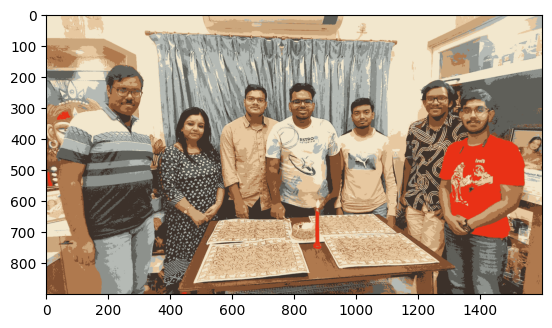

In [20]:
img1=color_quantization(img,k=10)
plt.imshow(img1)
plt.show()

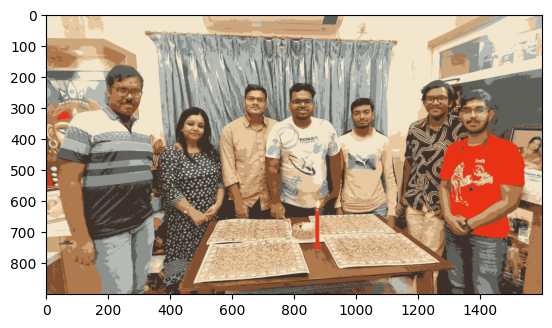

In [21]:
blurred=cv2.bilateralFilter(img1,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [22]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()

    plt.imshow(img)
    plt.show()

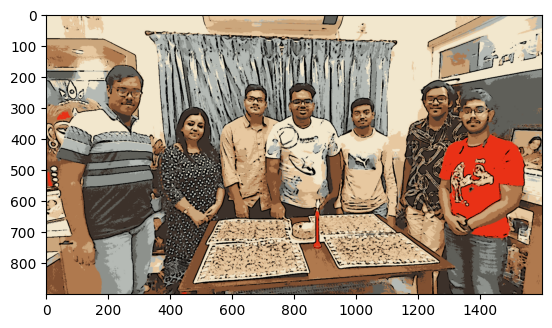

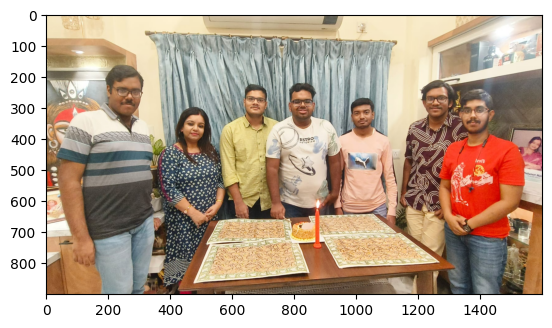

In [23]:
filename=cartoon()

In [24]:
# import os
# import shutil

# def upload_image(source_path, destination_folder):
#     if not os.path.exists(destination_folder):
#         os.makedirs(destination_folder)

#     try:
#         shutil.copy(source_path, destination_folder)
#         print(f"Image uploaded successfully to {destination_folder}")
#     except Exception as e:
#         print(f"Error uploading image: {e}")

# if __name__ == "__main__":
#     source_path = "" # Replace with the actual path to your image file
#     destination_folder = "sample"  # Replace with the desired destination folder

#     upload_image(source_path, destination_folder)
